# 머신러닝 2차세션 복습과제

- 8/29 화요일 23:59 까지 제출
- 지각 제출은 8/31 목요일 23:59 까지 허용
- 제출 파일명 : 비타민_12기_1주차_복습과제_홍길동.ipynb  로 제출
- ipynb 파일로 제출.


## 실습1

### 문제1
와인 품질을 예측하기 위한 데이터셋인 train.csv 입니다. 다음 코드를 로드하세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


train=pd.read_csv("/content/train.csv")
train = train.drop(['index',"type"], axis = 1)

train_label=train["quality"]
train_data=train.drop(["quality"], axis = 1)

### 1-1 (8점)
train_data 에는 feature dataset 이 , train_label 에는 품질 label 입니다.

전체 데이터 세트 중에 테스트 데이터 셋의 비율이 0.3 이 되게 하여 테스트 데이터와 학습데이터를 분류 하세요. (힌트 : train_test_split() 함수를 이용하세요.)
  
 - random_state=11로 설정해주세요

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(train_data, train_label, test_size=0.3, random_state=11)

### 1-2 (7점)
랜덤포레스트 분류를 위한 사이킷런 Classifier 클래스를 생성하세요.

In [ ]:
rf_clf=RandomForestClassifier(random_state=11)

### 1-3. (8점)
위에서 생성한 클래스를 활용하여 데이터를 학습하고 예측하고 평가하는 코드를 작성하세요 (힌트 : 평가할때는, accuracy_score 을 사용하세요.)

In [ ]:
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
print("예측 정확도 :",format(accuracy_score(y_test,pred)))

예측 정확도 : 0.6630303030303031


### 1-4 (13점)
KFold 클래스를 이용하여 랜덤 포레스트의 평균 정확도를 소수점 4째 자리까지 출력하세요.
- 폴드 개수는 3개로 설정합니다.
- 분류기는 위에서 사용한 랜덤포레스트를 이용합니다

In [ ]:
from sklearn.model_selection import KFold

#폴드세트를 3개인 KFold객체를 생성하세요
kfold = KFold(n_splits= 3)

#폴드 수만큼 예측결과를 저장을 위한 리스트 객체 생성
cv_accuracy = []

#for문을 이용하여 KFold교차 검증을 수행하는 코드를 작성하세요
for inter_n, (train_index, test_index) in enumerate(kfold.split(train_data)):
    #kfold.spilt()로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]
    y_train, y_test = train_label.iloc[train_index], train_label.iloc[test_index]

    #학습 및 예측
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)


# 3개의 fold에서의 평균 정화도 계산후 출력
print('\n ## 평균 검증 정확도:{0:.4f}'.format(np.mean(cv_accuracy)))



 ## 평균 검증 정확도:0.6482


### 1-5 (10점)
cross_val_score() 을 이용하여 평균 정확도를 구해보세요.
- 폴드개수는 3개로 설정합니다.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf,train_data, train_label, cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증별 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.6634 0.6485 0.6436]
평균 검증별 정확도:  0.6518


### 1-6 (13점)
GridSearchCV를 이용하여 랜덤포레스트의 최적하이퍼파라미터 찾고 예측성능을 측정해보세요.
- 폴드개수는 3개로 설정합니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [90,100,150],
          'max_features' : [1,3,5]
         }

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=3, refit=True)

grid_rf.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터: ', grid_rf.best_params_)
print('GridSearchCV 최적 정확도:{0:.4f} '.format(grid_rf.best_score_))

#GridSearchCV의 refit으로 이미 학습된 최적성능을 나타내는 모델로 테스트 데이터 세트의 정학도 출력하세요
estimator = grid_rf.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))


GridSearchCV 최적 파라미터:  {'max_features': 1, 'n_estimators': 100}
GridSearchCV 최적 정확도:0.6420 
테스트 데이터 세트 정확도: 0.6479


### 1-7 (13점) StandardScaler(평균이 0이고 분산이 1인지 확인하는 작업이 필요)

In [ ]:
from sklearn.preprocessing import StandardScaler

# train데이터에 각 변수의 평균값을 출력해주세요
print('train mean : ', train.mean())
print('train var : ', train.var())

# StandardScaler객체를 이용해서 평균이 0, 분산이 1이 되는지 확인해주세요
# variable 변수에 train열의 변수명들을 반환한 다음 scaledTrainDf에 데이터프레임 만들고, 값들은 StandardScaler객체로 스케일링 한 값으로 채워주시고, 열의 변수들은 variable변수를 이용해주세요
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train) # 반환값이 numpy이기 때문에 DataFrame으로 바꿔야합니다.

variable = train.columns.tolist()

scaledTrainDf = pd.DataFrame(data = train_scaled, columns = variable)

print('scaledTrainDf mean : ', scaledTrainDf.mean())
print('scaledTrainDf var : ', scaledTrainDf.var())

train mean :  quality                   5.818992
fixed acidity             7.210115
volatile acidity          0.338163
citric acid               0.318543
residual sugar            5.438075
chlorides                 0.055808
free sulfur dioxide      30.417682
total sulfur dioxide    115.566491
density                   0.994673
pH                        3.219502
sulphates                 0.530524
alcohol                  10.504918
dtype: float64
train var :  quality                    0.757441
fixed acidity              1.657860
volatile acidity           0.026642
citric acid                0.021055
residual sugar            22.625968
chlorides                  0.001201
free sulfur dioxide      312.366085
total sulfur dioxide    3168.364073
density                    0.000009
pH                         0.025829
sulphates                  0.022319
alcohol                    1.426887
dtype: float64
scaledTrainDf mean :  quality                -3.742080e-16
fixed acidity          -4.524103

### 1-8. (10점) MinMaxScaler (최소값 : 0 , 최대값 : 1이 중요)

  MinMaxScaler객체를 이용해서 최소값이 0, 최대값이 1이 되는지 확인해주세요.
    
결과 값은 앞에서와 같이 데이터프레임으로 만들고 각 변수의 최소값, 최대값을 확인해주세요.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
train_scaled = scaler.transform(train)

scaledTrainDf = pd.DataFrame(data = train_scaled, columns = variable)

print('scaledTrainDf min : ', scaledTrainDf.min())
print('scaledTrainDf max : ', scaledTrainDf.max())

scaledTrainDf min :  quality                 0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64
scaledTrainDf max :  quality                 1.0
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


## 실습2

### 문제 2
### 2-1. (8점) 데이터 인코딩

In [ ]:
# clothes 데이터를 인코딩하세요.(clothes 데이터는 이미 주어져있음)
clothes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot','T-shirt/top', 'Sneaker', 'Bag']

# items에서 중복된 값을 없애고 clothes변수에 list 자료형으로 반환하세요
clothes = list(set(clothes))

# items를 LabelEncoder를 이용해서 인코딩해주고 인코딩 한 결과 값을 객체의 classes_ 속성값으로 확인해주세요(from sklearn.preprocessing import LabelEncoder)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(clothes)
labels = encoder.transform(clothes)

print('classes_ :', encoder.classes_)

# 디코딩으로 인코딩이 제대로 되었는지 출력해서 확인해주세요(0,1,2,3,4,5 만 확인해주세요)
print('\ndecoding : ', encoder.inverse_transform([0,1,2,3,4,5]))


classes_ : ['Ankle boot' 'Bag' 'Coat' 'Dress' 'Pullover' 'Sandal' 'Shirt' 'Sneaker'
 'T-shirt/top' 'Trouser']

decoding :  ['Ankle boot' 'Bag' 'Coat' 'Dress' 'Pullover' 'Sandal']


### 2-2. (10점) 데이터 원 핫 인코딩

In [ ]:
# clothes를 2D numpy array로 변환해주고 clothes변수에 반환해주고 데이터 크기를 출력해주세요(import numpy as np)
import numpy as np
import pandas as pd

clothes = np.array(clothes).reshape(-1, 1)
print('Clothes type : ', clothes.shape)

# clothes를 원 핫 인코딩 해서 결과 값을 확인해주고, df 변수에 DataFrame으로 반환해주세요
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
oh_encoder.fit(clothes)
oh_labels = oh_encoder.transform(clothes)

df = pd.DataFrame(clothes)

print('oh_labels : ',oh_labels.toarray())
print('oh_labels : ', oh_labels.shape)

# df 데이터프레임으로 원 핫 인코딩을 해주세요
pd.get_dummies(df)

Clothes type :  (10, 1)
oh_labels :  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
oh_labels :  (10, 10)


,0_Ankle boot,0_Bag,0_Coat,0_Dress,0_Pullover,0_Sandal,0_Shirt,0_Sneaker,0_T-shirt/top,0_Trouser
0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


## 실습3

### 3. Data Loading (3점)

**a)** 본 과제에서는 대출신청서에 작성한 정보를 바탕으로 **대출신청 승인여부 (Loan_Status)** 가 결정된 이력 데이터로 사이킷런 머신러닝 학습을 진행합니다.

주어진 데이터 *loan.csv* 를 *pandas dataframe* 으로 불러온 후, **loan**으로 저장하고, 확인해주세요.  **(1점)**

In [ ]:
loan = pd.read_csv('/content/loan.csv')
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


**Feature Information**
* *Loan_ID* :  대출 ID
* *Gender* :  성별
* *Married* :  결혼 여부
* *Dependents* :  부양자 수
* *Education*:  대학졸업 여부
* *Self_Employed*:  자영업 여부
* *ApplicantIncome*:  소득수준
* *CoapplicantIncome*:  배우자 소득수준
* *LoanAmount*:  대출금액
* *Loan_Amount_Term*:  대출 상환 기간
* *Credit_History*:  신용(대출 상환, 신용카드 등) 기록 여부
* *Property_Area*:  주거 지역
* *Loan_Status*:  대출 가능 여부

**b)** loan data 정보를 출력하고 (`info` 이용) loan data의 숫자형 변수의 분포를 알아봅시다. (`describe` 이용) **(1점)**

In [ ]:
# loan 데이터 프레임 정보 출력
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# loan 데이터 프레임의 숫자형 변수의 분포 출력
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


 **c)** 'Dependent' 열의 항목별 분포를 출력해보고, '3+'라고 입력되어 있는 행에 대하여 그 값을 '3'으로 바꿔주세요. (`replace` 이용) **(1점)**

In [ ]:
# 'Dependent'열의 항목별 분포 출력
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# replace 처리
loan['Dependents']=loan['Dependents'].replace('3+','3')

## 실습4

### 4. 결측값 처리 (3점)

숫자형 변수에 대해서는 null값을 각 열의 **평균값**으로, 문자형 변수에 대해서는 null값을 각 열의 **최빈값**으로 채워주세요

In [ ]:
# 숫자형 변수 컬럼 평균값 계산
numeric_columns = loan.select_dtypes(include=['number'])
numeric_column_means = numeric_columns.mean()

# 결측치 컬럼별 평균으로 대체
numeric_columns.fillna(numeric_column_means, inplace=True)

# 문자형 변수 최빈값 계산
text_columns = loan.select_dtypes(include=['object'])

#각  컬럼별 최빈값 get
text_column_modes = text_columns.mode().iloc[0]
text_columns.fillna(text_column_modes, inplace=True)

#원본 데이터프레임에 컨캣
loan = pd.concat([numeric_columns, text_columns], axis=1)

print(loan)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History   Loan_ID  Gender Married Dependents     Education  \
0               1.0  LP001002    Male      No    

## 실습5

### 5. 이상치 처리 (4점)

**a)** ApplicantIncome, CoapplicantIncome, LoanAmount의 분포를 시각화하세요. (`boxplot` 이용)

<Axes: >

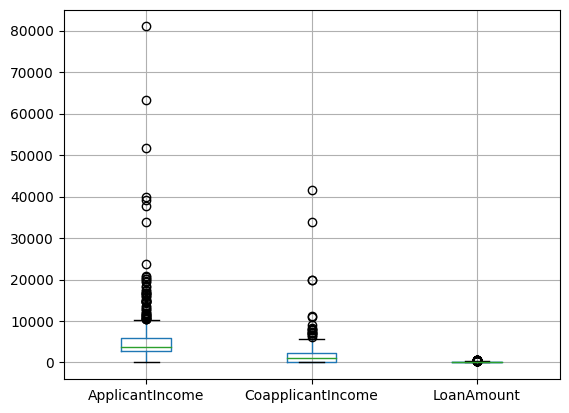

In [ ]:
#이상치 확인을 위해 사분위수 정보를 포함하는 박스플롯으로 시각화
loan.boxplot(column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

**b)** ApplicantIncome, CoapplicantIncome, LoanAmount의 분포를 확인 후, 이상치를 탐색하여 drop하세요.

각 column에 대하여 이상치가 있다고 판단되는 **모든 행** 을 drop해주시면 됩니다.

(이상치 제거는 본인이 선호하는 방법으로 하시거나, *Tukey Fences* 방법 (답안에서 이용 예정) 을 이용해주세요. )

In [ ]:
#Tukey Fences 사용
#이상치 제거 함수 생성

def handle_outliers(df, column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)

    iqr = q3 - q1

    boundary = 1.5 * iqr
    lower_bound = q1 - boundary
    upper_bound = q3 + boundary

    df = df[(df[column]<upper_bound)&(df[column]>lower_bound)]

    return df

In [ ]:
loan = handle_outliers(loan, 'ApplicantIncome')
loan = handle_outliers(loan, 'CoapplicantIncome')
loan = handle_outliers(loan, 'LoanAmount')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    520 non-null    int64  
 1   CoapplicantIncome  520 non-null    float64
 2   LoanAmount         520 non-null    float64
 3   Loan_Amount_Term   520 non-null    float64
 4   Credit_History     520 non-null    float64
 5   Loan_ID            520 non-null    object 
 6   Gender             520 non-null    object 
 7   Married            520 non-null    object 
 8   Dependents         520 non-null    object 
 9   Education          520 non-null    object 
 10  Self_Employed      520 non-null    object 
 11  Property_Area      520 non-null    object 
 12  Loan_Status        520 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 56.9+ KB


## 실습6

### 6. 인코딩 (20점)

머신러닝 모델이 데이터를 학습할 수 있도록, Dtype이 **'object'** 인 컬럼들에 대하여 인코딩을 실행해줍니다.

**a)** 먼저, 부양가족의 수를 의미하는 'Dependent'열의 dtype을 **object**에서 **int**로 바꿔주세요. (`.astype` 이용) **(4점)**

In [ ]:
loan['Dependents']=loan['Dependents'].astype('int')
loan['Dependents'].value_counts()

0    315
2     86
1     81
3     38
Name: Dependents, dtype: int64

**b)** 'Yes/No'의 형태로 기록되어 있는 열들 ('Married', 'Education', 'Self_Employed', 'Loan_Status')에 대하여 **Label Encoding**을 시행하세요. **(6점)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Married', 'Education', 'Self_Employed','Loan_Status']
    le = LabelEncoder()
    for feature in features:
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

loan = encode_features(loan)

loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,LP001002,Male,0,0,0,0,Urban,1
1,4583,1508.0,128.000000,360.0,1.0,LP001003,Male,1,1,0,0,Rural,0
2,3000,0.0,66.000000,360.0,1.0,LP001005,Male,1,0,0,1,Urban,1
3,2583,2358.0,120.000000,360.0,1.0,LP001006,Male,1,0,1,0,Urban,1
4,6000,0.0,141.000000,360.0,1.0,LP001008,Male,0,0,0,0,Urban,1


**c)** 머신러닝 알고리즘에 불필요한 열을 제거해주세요. (*힌트 : 1개의 열만 제거하면 됩니다.*  ) **(3점)**

In [ ]:
# 'Loan_ID' column 삭제
loan.drop(columns = 'Loan_ID', axis = 1, inplace = True)

**d)** 나머지 문자형 변수 ('Gender'와 'Property_Area')에 대해서는 **OneHotEncoding**을 시행하세요. **(6점)**

(`OneHotEncoder` 또는 `pd.get_dummies` 모두 이용 가능)

In [ ]:
loan=pd.get_dummies(loan)
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Dependents,Education,Self_Employed,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,0,0,0,1,0,1,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,1,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,0,1,1,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,0,1,0,0,1


**e)** 마지막으로 `.info()`를 이용하여 object type, null값 확인 등을 통해 모델링에 쓰일 수 있는 data인지 최종 검토합니다! **(1점)**

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          520 non-null    int64  
 1   CoapplicantIncome        520 non-null    float64
 2   LoanAmount               520 non-null    float64
 3   Loan_Amount_Term         520 non-null    float64
 4   Credit_History           520 non-null    float64
 5   Married                  520 non-null    int64  
 6   Dependents               520 non-null    int64  
 7   Education                520 non-null    int64  
 8   Self_Employed            520 non-null    int64  
 9   Loan_Status              520 non-null    int64  
 10  Gender_Female            520 non-null    uint8  
 11  Gender_Male              520 non-null    uint8  
 12  Property_Area_Rural      520 non-null    uint8  
 13  Property_Area_Semiurban  520 non-null    uint8  
 14  Property_Area_Urban      5

## 실습7

### 7. Train Test Split (15점)

**a)** feature 데이터를 x라는 새로운 데이터프레임으로 불러오고, 테스트용 데이터셋의 사이즈는 0.25로 설정하여 train_test_split을 실행하세요. **(10점)**

In [ ]:
#Spliting the dataset into features and target

x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

In [ ]:
#Train & Test data split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(390, 14) (130, 14) (390,) (130,)


**b)** 아래 코드를 실행해주세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier(random_state=10)

**c)** DecisionTreeClassifier를 이용하여 학습/예측/평가를 해주세요. (`.fit()`, `.predict()`, `accuracy_score()` 이용)  **(5점)**

In [ ]:
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)
print(accuracy_score(ytest, dt_pred))

0.7461538461538462


## 실습8

### 8.1. Stratified KFold  (20점)

**a)** 아래 코드를 실행 후 진행해주세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
dt=DecisionTreeClassifier(random_state=10)

**b)** loan data의 index를 재정렬하고 변수 **x**에 loan의 "Loan_Status"열을 제외한 모든 데이터를, 변수 **y**에 loan의 "Loan_Status"열의 데이터를 저장한 다음 x,y의 길이를 확인해주세요.**(4점, `shape`사용)**

In [ ]:
loan.reset_index(drop=True, inplace=True)
x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

print(x.shape[0], y.shape[0])

520 520


**c)** 변수 **kfold**에 k=4인 KFold 객체를 만들어 주고 **cv_accuracy_1** 리스트에 각 반복의 정확도를 소수점 5째 자리에서 반올림 한 다음 저장한 후 평균을 출력해주세요. **(6점, `split` 이용)**

In [ ]:
kfold=KFold(n_splits=4)
cv_accuracy_1=[]

for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(x_train, y_train)
    pred=dt.predict(x_test)
    accuracy=np.round(accuracy_score(y_test, pred),4)
    cv_accuracy_1.append(accuracy)
print(np.mean(cv_accuracy_1))

0.75


**d)** 레이블 값의 분포도를 확인해 주세요. **(2점)**

In [ ]:
y.value_counts()

1    362
0    158
Name: Loan_Status, dtype: int64

**e)** 변수 **skf**에 k=4인 StratifedKFold 객체를 만들어 주고 **cv_accuracy_2**리스트에 각 반복의 정확도를 소수점 5째 자리에서 반올림 한 다음 저장한 후 평균을 출력해주세요. **(8점, `split` 이용)**

In [ ]:
skf=StratifiedKFold(n_splits=4)
cv_accuracy_2=[]

for train_index, test_index in skf.split(x,y):
    label_train=y[train_index]
    label_test=y[test_index]
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(x_train, y_train)
    pred=dt.predict(x_test)
    accuracy=np.round(accuracy_score(y_test, pred),4)
    cv_accuracy_2.append(accuracy)
print(np.mean(cv_accuracy_2))

0.7615500000000001


## 8.2. Cross val score  (10점)

위에서 진행한 교차검증을 cross_val_score API를 이용하여 같은 결과를 내세요, 평가지표는 accuaracy를 사용하세요. **(10점)**

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt,x,y,scoring='accuracy',cv=3)

print('정확도 평균:',np.mean(scores))

정확도 평균: 0.7441919695258344


## 실습9

### 9. GridSearchCV  (25점)

**a)** 결정트리 모델(dt)의 하이퍼 파라미터를 찾는 코드를 작성하세요.(max_depth 값 3개(값은 자유), min_samples_split 값 3개(값은 자유), cv=3, refit=True 으로 설정) **(15점)**

fitting은 **6번 문제** 에서 train_test_split을 통해 만든 **train dataset**에 대하여 적용해주시면 됩니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,4],'min_samples_split':[4,5,6]}    #숫자는 자유
grid=GridSearchCV(dt,param_grid=parameters,cv=3,refit=True)
grid.fit(xtrain,ytrain)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002408,0.000450,0.001445,0.000029,2,4,"{'max_depth': 2, 'min_samples_split': 4}",0.807692,0.815385,0.807692,0.810256,0.003626,4
1,0.002162,0.000074,0.001779,0.000312,2,5,"{'max_depth': 2, 'min_samples_split': 5}",0.807692,0.815385,0.807692,0.810256,0.003626,4
2,0.003315,0.000280,0.001883,0.000362,2,6,"{'max_depth': 2, 'min_samples_split': 6}",0.807692,0.815385,0.807692,0.810256,0.003626,4
3,0.002167,0.000031,0.001459,0.000041,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.807692,0.823077,0.838462,0.823077,0.012561,1
4,0.002173,0.000034,0.001478,0.000078,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.807692,0.823077,0.838462,0.823077,0.012561,1
5,0.002227,0.000104,0.001590,0.000111,3,6,"{'max_depth': 3, 'min_samples_split': 6}",0.807692,0.823077,0.807692,0.812821,0.007252,3
6,0.002577,0.000103,0.001598,0.000018,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.784615,0.800000,0.838462,0.807692,0.022646,7
7,0.002441,0.000031,0.001547,0.000034,4,5,"{'max_depth': 4, 'min_samples_split': 5}",0.784615,0.800000,0.838462,0.807692,0.022646,7
8,0.002688,0.000096,0.001535,0.000021,4,6,"{'max_depth': 4, 'min_samples_split': 6}",0.784615,0.800000,0.807692,0.797436,0.009594,9


**b)** 위에서 진행한 GridSearchCV의 결과를 출력하고 그를 해석하세요.

(최적의 하이퍼파라미터가 무엇인지, 출력되는 정확도의 개수 및 어떻게 그 개수가 나오는지 등..) **(10점)**

In [ ]:
# 답: 최적의 하이퍼파라미터는 max_depth=3인 경우,
# 정확도의 개수는 각각 파라미터 3개씩, fold수 3개로 3x3x3=27개가 출력됨